# Multi-Class Prediction

## Import the Libraries

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Gathering Data

*Load the train data table*

In [31]:
TRAIN_DT = pd.read_csv('csv/bmi_train.csv')
TRAIN_DT.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


*Load the validation data table*

In [32]:
VALIDATION_DT = pd.read_csv('csv/bmi_validation.csv')
VALIDATION_DT.head()

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75
2,Male,174,95
3,Female,179,103
4,Female,192,140


## Assessing Data

In [33]:
TRAIN_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [34]:
VALIDATION_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  100 non-null    object
 1   Height  100 non-null    int64 
 2   Weight  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


*Looking for empty or null data/cell in dataset*

In [35]:
TRAIN_DT.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [36]:
VALIDATION_DT.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

*Looking for duplicated data in dataset*

In [37]:
TRAIN_DT.duplicated().sum()

8

In [38]:
VALIDATION_DT.duplicated().sum()

0

## Cleaning and Splitting the Data

*Making copy of datasets and drop all the duplicates data in train dataset*

In [39]:
train_dt_c = TRAIN_DT.copy()
train_dt_c.drop_duplicates(inplace=True)

valid_dt_c = VALIDATION_DT.copy()

*Using map function to encoding the gender feature with numerical type, 0 for male and 1 for female*

In [40]:
train_dt_c['Gender'] = train_dt_c['Gender'].map({'Male': 0, 'Female': 1})
valid_dt_c['Gender'] = valid_dt_c['Gender'].map({'Male': 0, 'Female': 1})

*Separate the features and label for train dataset*

In [41]:
x_train = train_dt_c.drop('Index', axis=1)
y_train = train_dt_c['Index']

In [42]:
x_train.head()

,Gender,Height,Weight
0,0,161,89
1,0,179,127
2,0,172,139
3,0,153,104
4,0,165,68


In [43]:
y_train.head()

0    4
1    4
2    5
3    5
4    2
Name: Index, dtype: int64

## Exploring the data

In [44]:
x_train.describe(include="all")

,Gender,Height,Weight
count,392.000000,392.000000,392.000000
mean,0.497449,170.339286,106.224490
std,0.500632,16.615701,32.510012
min,0.000000,140.000000,50.000000
25%,0.000000,156.000000,80.000000
50%,0.000000,171.000000,107.000000
75%,1.000000,184.000000,137.000000
max,1.000000,199.000000,160.000000


In [45]:
y_train.describe(include="all")

count    392.000000
mean       3.737245
std        1.379366
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64

In [46]:
valid_dt_c.describe(include="all")

,Gender,Height,Weight
count,100.00,100.000000,100.000000
mean,0.55,168.270000,105.760000
std,0.50,15.521803,32.626172
min,0.00,141.000000,51.000000
25%,0.00,156.000000,76.500000
50%,1.00,168.000000,103.500000
75%,1.00,180.250000,135.250000
max,1.00,197.000000,160.000000


In [47]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

print ('\nThe shape of validation dataset is: ' + str(valid_dt_c.shape))
print ('We have m = %d validation examples' % (len(valid_dt_c)))

The shape of X_train is: (392, 3)
The shape of y_train is: (392,)
We have m = 392 training examples

The shape of validation dataset is: (100, 3)
We have m = 100 validation examples


## Visualize the Data

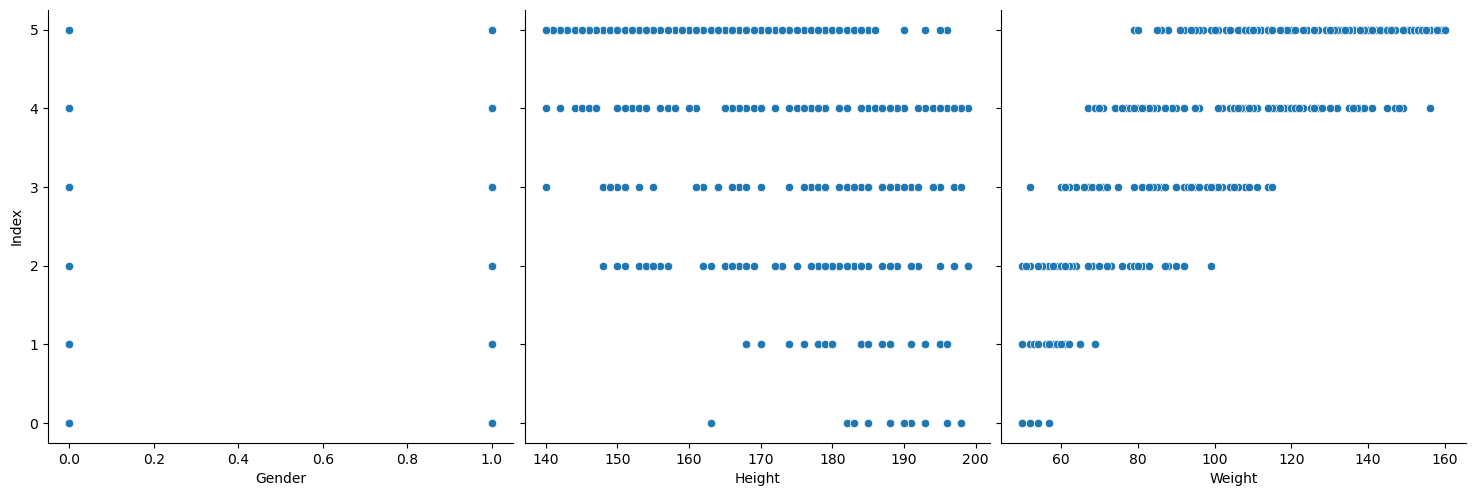

In [48]:
sns.pairplot(train_dt_c, x_vars=['Gender', 'Height', 'Weight'], y_vars=['Index'], height=5)
plt.show()

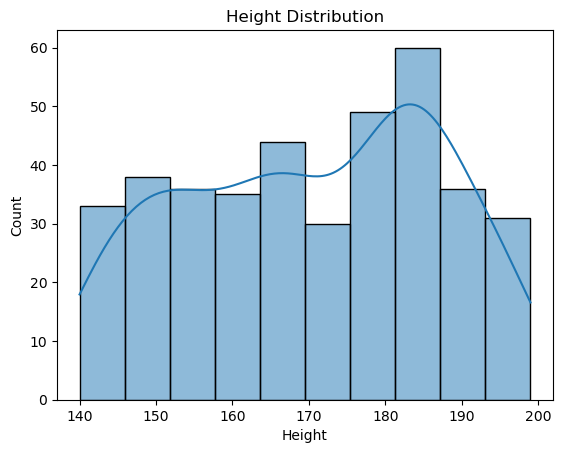

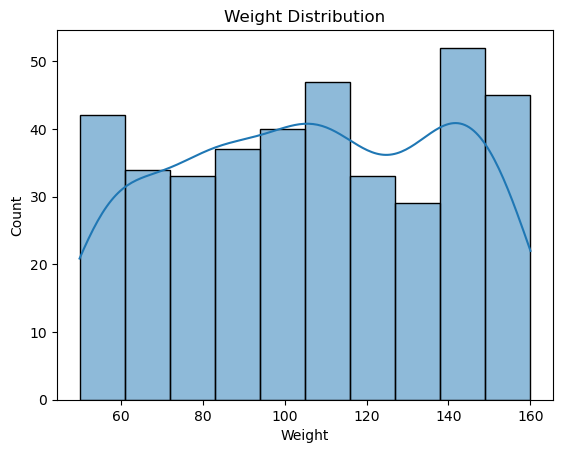

In [49]:
sns.histplot(x_train['Height'], kde=True)
plt.title('Height Distribution')
plt.show()

sns.histplot(x_train['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()

## Preprocessing the Data

In [52]:
# Define preprocessing for numeric and categorical features
numeric_features = ['Height', 'Weight']

# Define the scaler
scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features)
    ])

X_train_processed = preprocessor.fit_transform(x_train)
X_val_processed = preprocessor.transform(valid_dt_c)

In [60]:
x_train['Height'].shape

(392,)

In [68]:
X_train_processed

array([[0.3559322 , 0.35454545],
       [0.66101695, 0.7       ],
       [0.54237288, 0.80909091],
       [0.22033898, 0.49090909],
       [0.42372881, 0.16363636],
       [0.54237288, 0.38181818],
       [0.71186441, 0.52727273],
       [0.66101695, 0.72727273],
       [0.03389831, 0.19090909],
       [0.30508475, 0.93636364],
       [0.91525424, 0.52727273],
       [0.6440678 , 0.51818182],
       [0.25423729, 0.06363636],
       [0.18644068, 0.12727273],
       [0.69491525, 0.27272727],
       [0.11864407, 0.69090909],
       [0.03389831, 0.99090909],
       [0.42372881, 0.95454545],
       [0.10169492, 0.49090909],
       [0.28813559, 0.05454545],
       [0.55932203, 0.29090909],
       [0.50847458, 0.47272727],
       [0.84745763, 0.61818182],
       [0.47457627, 0.81818182],
       [0.22033898, 0.25454545],
       [0.81355932, 0.66363636],
       [0.37288136, 0.12727273],
       [0.71186441, 0.49090909],
       [0.91525424, 0.59090909],
       [0.76271186, 0.47272727],
       [0.

## Training the Data

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ]) 
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    return model

In [ ]:
# model = create_model()
# model.fit(
#     x_train, y_train,
#     epochs=100
# )

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0648 - loss: 11.9152
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0446 - loss: -346.3800
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0407 - loss: -724.6580
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0429 - loss: -1296.9609
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0433 - loss: -1964.7695
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0339 - loss: -3345.4182
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0501 - loss: -5050.6069
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0450 - loss: -8082.1304
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0349 - loss: -10695.6357    
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0371 - loss: -12880.7031    
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0575 - loss: -19735.1328
Ep

In [ ]:
# model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,501 (103.52 KB)

 Trainable params: 8,833 (34.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,668 (69.02 KB)